In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('OnlineRetail.csv', encoding= 'unicode_escape')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

### Data Overview 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
print("Data Overview:")
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Data Overview:
Number of rows: 541909
Number of columns: 8


In [7]:
print("\nColumn Names:")
print(df.columns)


Column Names:
Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [8]:
print(df.dtypes)
print("\nSummary Statistics:")

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

Summary Statistics:


In [9]:
print(df.describe())
print("\nMissing Values:")

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

Missing Values:


In [10]:
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [11]:
df.dropna(inplace=True)

In [12]:
df['Country'].value_counts()

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

In [13]:
#we are not going to use stock code so drop it
df.drop('StockCode',axis=1,inplace=True)

In [14]:
df.shape

(406829, 7)

###### Check for negative values

In [15]:
df[df['Quantity'] < 0]

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...
540449,C581490,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [16]:
df[df['UnitPrice'] < 0]

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [17]:
# drop negative values
df.drop(df[df['Quantity'] < 0].index, inplace = True)
df.drop(df[df['UnitPrice'] < 0].index, inplace = True)

In [18]:
df.shape

(397924, 7)

In [19]:
df.head()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## RFM (Recency, Frequency, Monetary) ANALYSIS

We are going to analysis the Customers based on below 4 factors:

1.Total amount a customer spent: Amount = Quantity * UnitPrice

2.Number of transaction: Number of InvoiceNo by Customer

3.Last transaction: the days since last transaction

4.Country: country where customer made the transaction

#####  1.Total amount a customer spent: Amount = Quantity * UnitPrice

In [20]:
#creating feature for amount spend by customer
df['amount']=df['Quantity']*df['UnitPrice']

In [21]:
df.head()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [22]:
print('unique values in customer column',df['CustomerID'].unique())
print('no.of unique values in customer column',df["CustomerID"].nunique())

unique values in customer column [17850. 13047. 12583. ... 13298. 14569. 12713.]
no.of unique values in customer column 4339


In [23]:
print('unique values in Quantity column',df['Quantity'].unique())
print('no.of unique values in Quantity column',df["Quantity"].nunique())

unique values in Quantity column [    6     8     2    32     3     4    24    12    48    18    20    36
    80    64    10   120    96    23     5     1    50    40   100   192
   432   144   288    16     9   128    25    30    28     7    72   200
   600   480    14    11    70   252    60   216   384    27   108    52
    75   270    42   240    90   320    17  1824   204    69   160  2880
  1400    19    39    56    13  1440    15   720   156   324    41   402
   378   150   300    22    34   408   972   208  1008    26  1000  1488
   250  1394   400   110    37    78    21   272    84    47  1728    38
    53    76   576    29  2400   500   180   960  1296   147   168   256
    54    31   860  1010  1356  1284   186   114   360  1930  2000  3114
  1300   670   176   648    62 74215    89    33    46   112   456   900
    45   130  2592   420   800    35  1200   864   504  1056  1500   280
   407   141  3906  1152   198   117   125    81   768    88    43   700
  2160    55   342

In [24]:
print('unique values in Country column',df['Country'].unique())
print('no.of unique values in Country column',df["Country"].nunique())

unique values in Country column ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Finland' 'Austria' 'Greece' 'Singapore' 'Lebanon'
 'United Arab Emirates' 'Israel' 'Saudi Arabia' 'Czech Republic' 'Canada'
 'Unspecified' 'Brazil' 'USA' 'European Community' 'Bahrain' 'Malta' 'RSA']
no.of unique values in Country column 37


In [25]:
total_money=df.groupby('CustomerID')['amount'].sum().reset_index().sort_values(by='amount', ascending=False)
total_money


,CustomerID,amount
1690,14646.0,280206.02
4202,18102.0,259657.30
3729,17450.0,194550.79
3009,16446.0,168472.50
1880,14911.0,143825.06
...,...,...
4099,17956.0,12.75
3015,16454.0,6.90
1794,14792.0,6.20
3218,16738.0,3.75


So these are customers paying amount

#####  2.Number of transaction: Number of InvoiceNo by Customer

In [26]:
#number_transaction:
number_transaction=df.groupby('CustomerID')['InvoiceNo'].count().reset_index().sort_values(by='InvoiceNo', ascending=False)
number_transaction

,CustomerID,InvoiceNo
4011,17841.0,7847
1880,14911.0,5677
1290,14096.0,5111
326,12748.0,4596
1662,14606.0,2700
...,...,...
2639,15940.0,1
2559,15823.0,1
2541,15802.0,1
2506,15753.0,1


##### 3.Last transaction: the days since last transaction

In [27]:
#Last transaction: 
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Last_transaction']=(df['InvoiceDate'].max()-df['InvoiceDate']).dt.days
last_transaction = df.groupby(['CustomerID','Country'])['Last_transaction'].max().reset_index().sort_values(by='Last_transaction', ascending=False)
last_transaction

,CustomerID,Country,Last_transaction
1758,14729.0,United Kingdom,373
334,12748.0,United Kingdom,373
1055,13758.0,United Kingdom,373
542,13047.0,United Kingdom,373
3780,17511.0,United Kingdom,373
...,...,...,...
2304,15471.0,United Kingdom,1
2338,15520.0,United Kingdom,1
724,13298.0,United Kingdom,0
1645,14569.0,United Kingdom,0


##### 4. Creating RFM dataset:


Now, I will Merge and Create the RFM dataset:

In [28]:
merge1= pd.merge(last_transaction, number_transaction, how='inner', on='CustomerID')
new_df=pd.merge(merge1,total_money,how='inner',on= 'CustomerID')
new_df

,CustomerID,Country,Last_transaction,InvoiceNo,amount
0,14729.0,United Kingdom,373,71,313.49
1,12748.0,United Kingdom,373,4596,33719.73
2,13758.0,United Kingdom,373,117,3190.55
3,13047.0,United Kingdom,373,172,3237.54
4,17511.0,United Kingdom,373,963,91062.38
...,...,...,...,...,...
4342,15471.0,United Kingdom,1,77,469.48
4343,15520.0,United Kingdom,1,18,343.50
4344,13298.0,United Kingdom,0,2,360.00
4345,14569.0,United Kingdom,0,12,227.39


## EDA

##### 1.Remove Outlier:

There are several method to remove outlier such as IQR method, Z-score Method, Standard Deviation Method.

In this kernel, I use IQR method to remove outliers.

First, I will plot the boxplot to show the distribution of new data

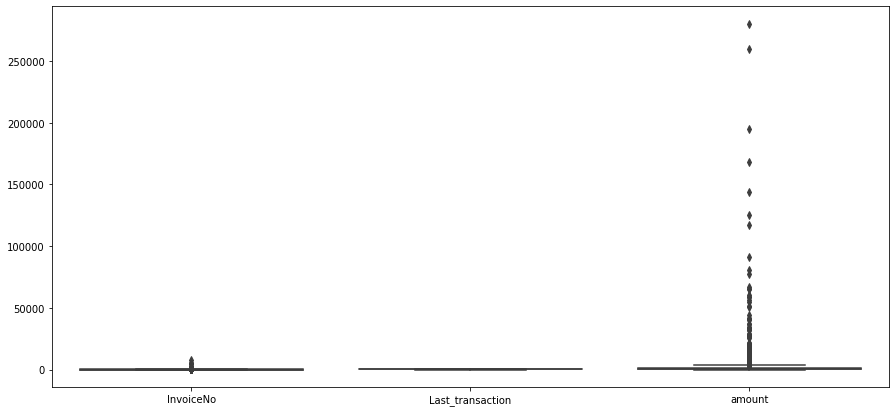

In [29]:
plt.figure(figsize=(15,7))
sns.boxplot(data = new_df[['InvoiceNo','Last_transaction','amount']])
plt.show()

Winsorization

Winsorization is the process of replacing the extreme values of statistical data in order to limit the effect of the outliers on the calculations or the results obtained by using that data. The mean value calculated after such replacement of the extreme values is called winsorized mean.

For example, 90% winsorization means the replacement of the top 5% and bottom 5% of the data. The top 5% of the data is replaced by the value of the data at the 95th percentile and the value of the bottom 5% of the data is replaced by the value of the data at the 5th percentile.

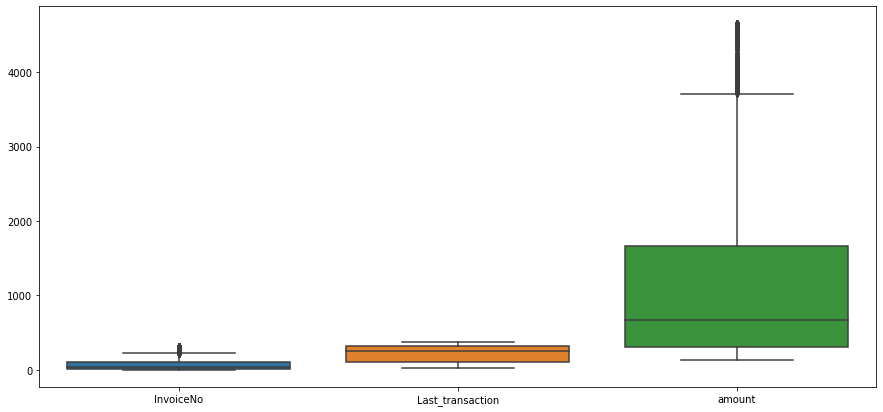

In [30]:
from scipy.stats.mstats import winsorize
winsorize(new_df['InvoiceNo'],(0.05,0.05),inplace=True)
winsorize(new_df['Last_transaction'],(0.05,0.05),inplace=True)
winsorize(new_df['amount'],(0.07,0.07),inplace=True)
plt.figure(figsize=(15,7))
sns.boxplot(data = new_df[['InvoiceNo','Last_transaction','amount']])
plt.show()

In [31]:
### The new data frame after removing outlier
new_df.reset_index(drop=True, inplace= True)
new_df

,CustomerID,Country,Last_transaction,InvoiceNo,amount
0,14729.0,United Kingdom,370,71,313.49
1,12748.0,United Kingdom,370,314,4652.82
2,13758.0,United Kingdom,370,117,3190.55
3,13047.0,United Kingdom,370,172,3237.54
4,17511.0,United Kingdom,370,314,4652.82
...,...,...,...,...,...
4342,15471.0,United Kingdom,25,77,469.48
4343,15520.0,United Kingdom,25,18,343.50
4344,13298.0,United Kingdom,25,4,360.00
4345,14569.0,United Kingdom,25,12,227.39


##### 2.Data Visualization

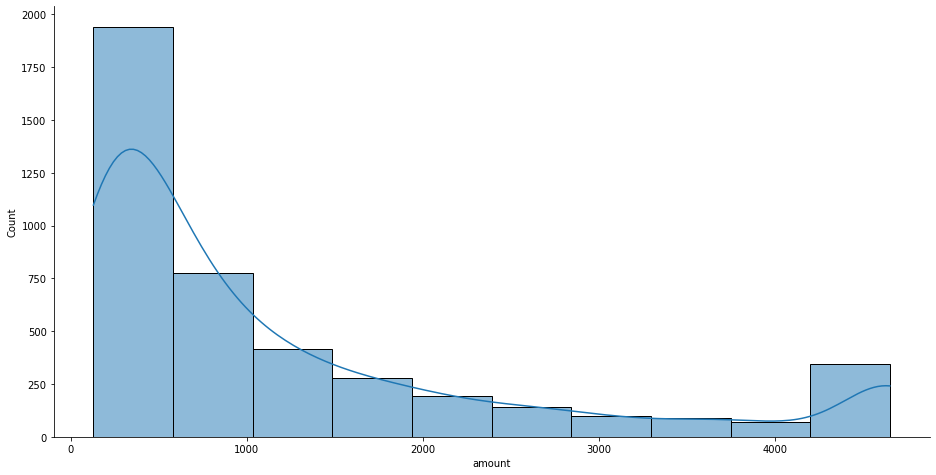

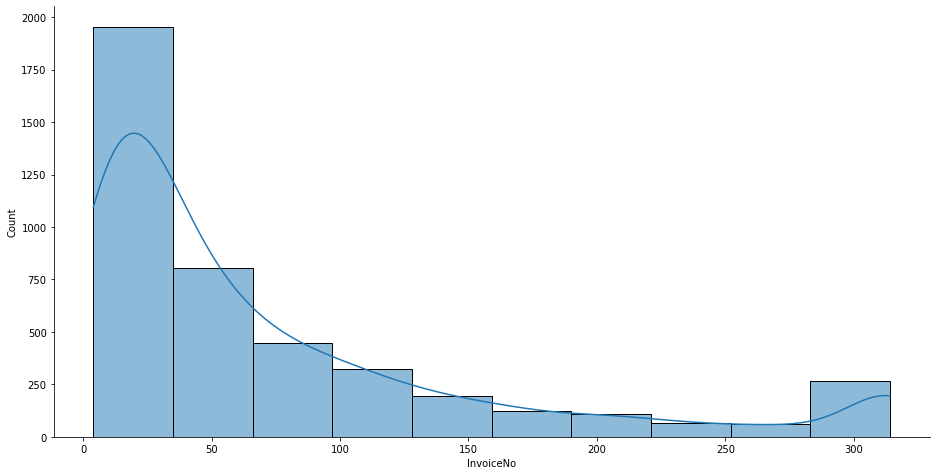

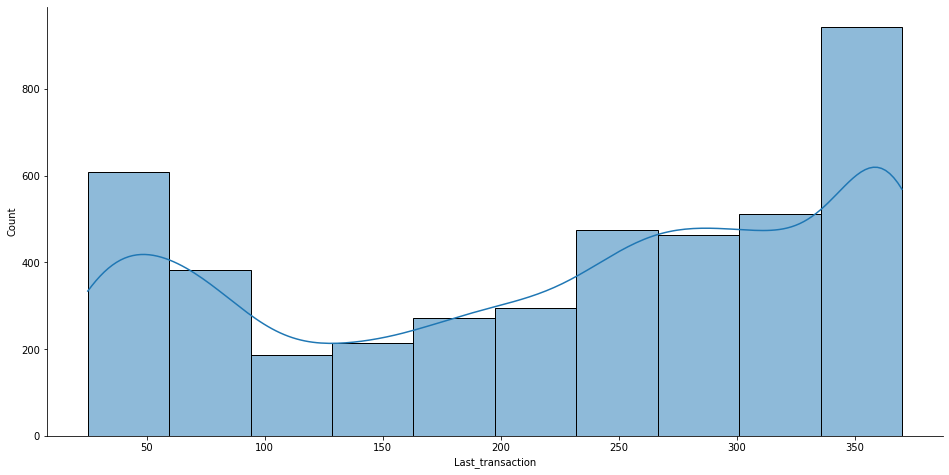

In [32]:
#Histogram Plot: 
new1_df=new_df.copy()
df_num=['amount','InvoiceNo','Last_transaction']
for i in df_num:
    sns.displot(new1_df[i],bins=10,kde=True)
    plt.gcf().set_size_inches(15, 7)
    plt.show()

Total Amount (Monetary) and InvoiceNo (Frequency) histogram are right-skewed

Last_Transaction (Recency) histogram is bimodal

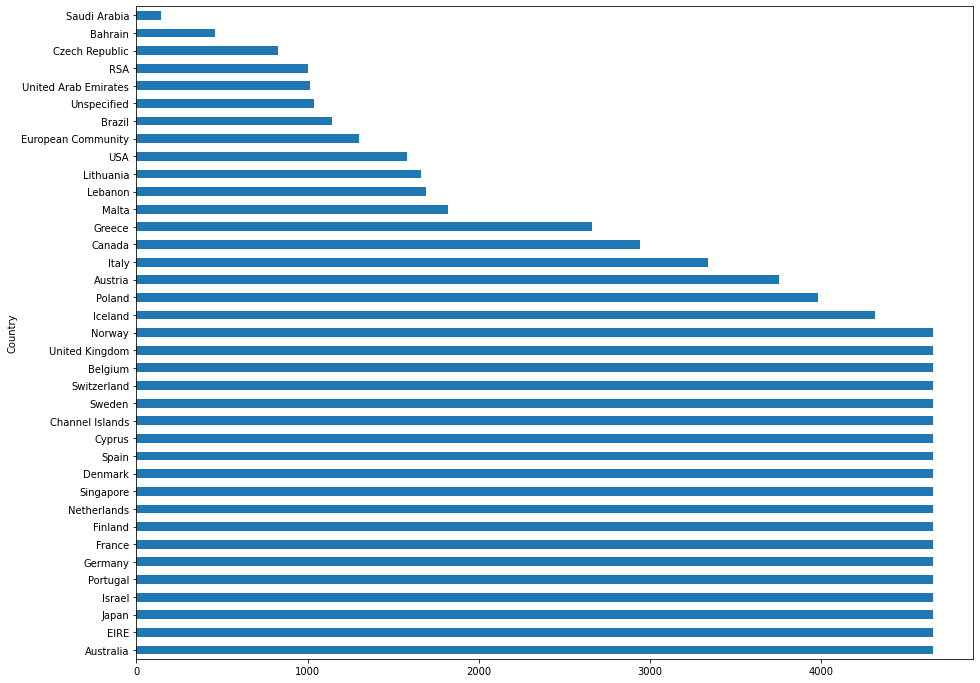

In [33]:
# Group the Maximum Total Amount by Country:
plt.figure(figsize=(15,12))
new1_df.groupby("Country").amount.max().sort_values(ascending=False).plot.barh()
plt.show()

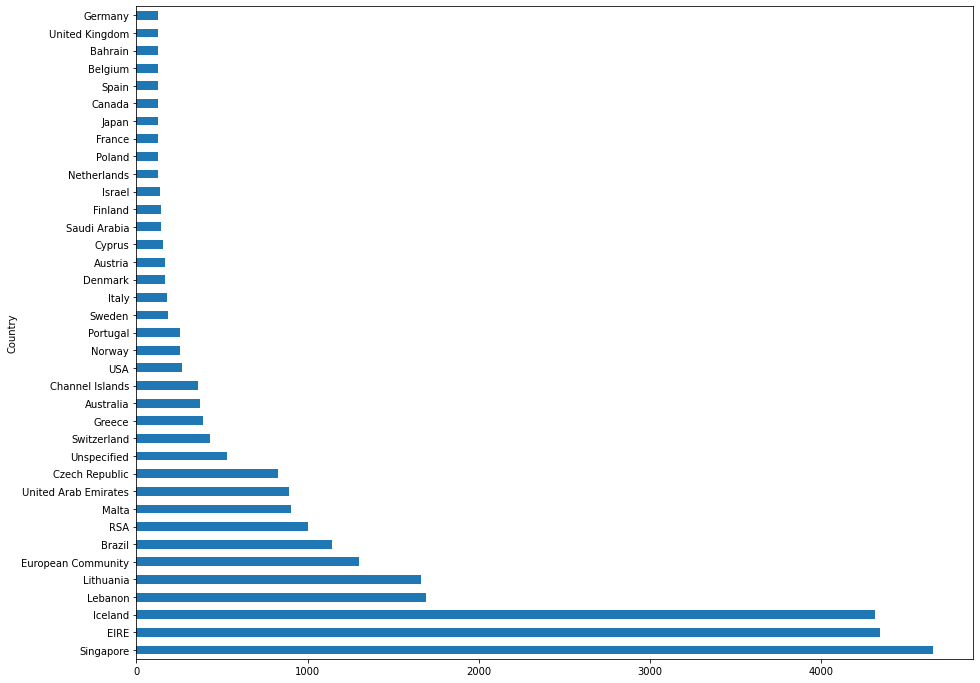

In [34]:
# Group the Minimum Total Amount by Country:
plt.figure(figsize=(15,12))
new1_df.groupby("Country").amount.min().sort_values(ascending=False).plot.barh()
plt.show()

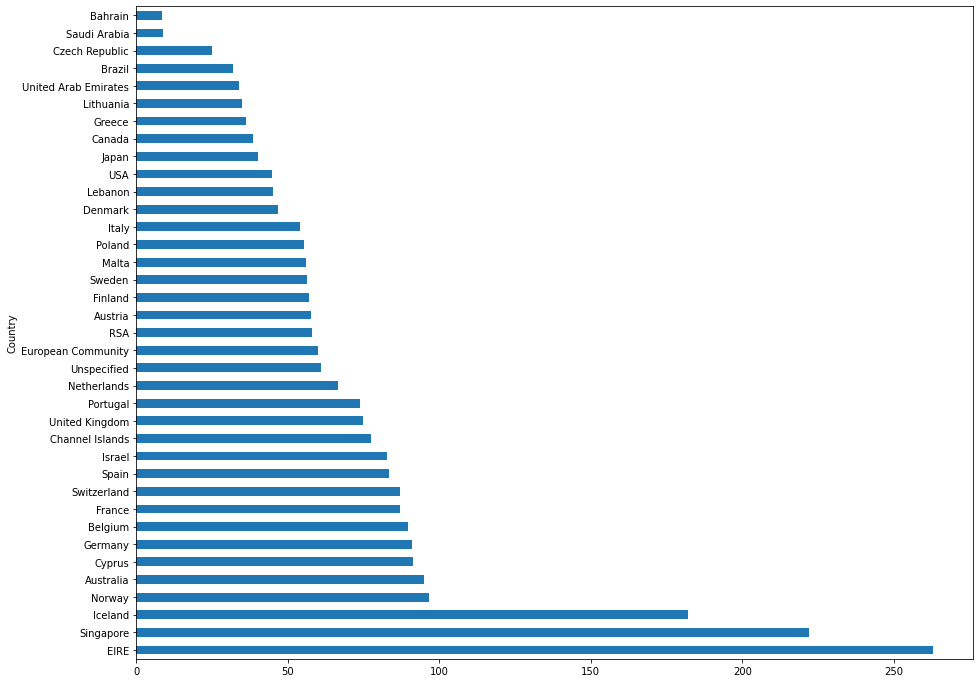

In [35]:
# Group by the Frequency by Country
plt.figure(figsize=(15,12))
new1_df.groupby("Country").InvoiceNo.mean().sort_values(ascending=False).plot.barh()
plt.show()

On Average, customers in EIRE shop most frequently

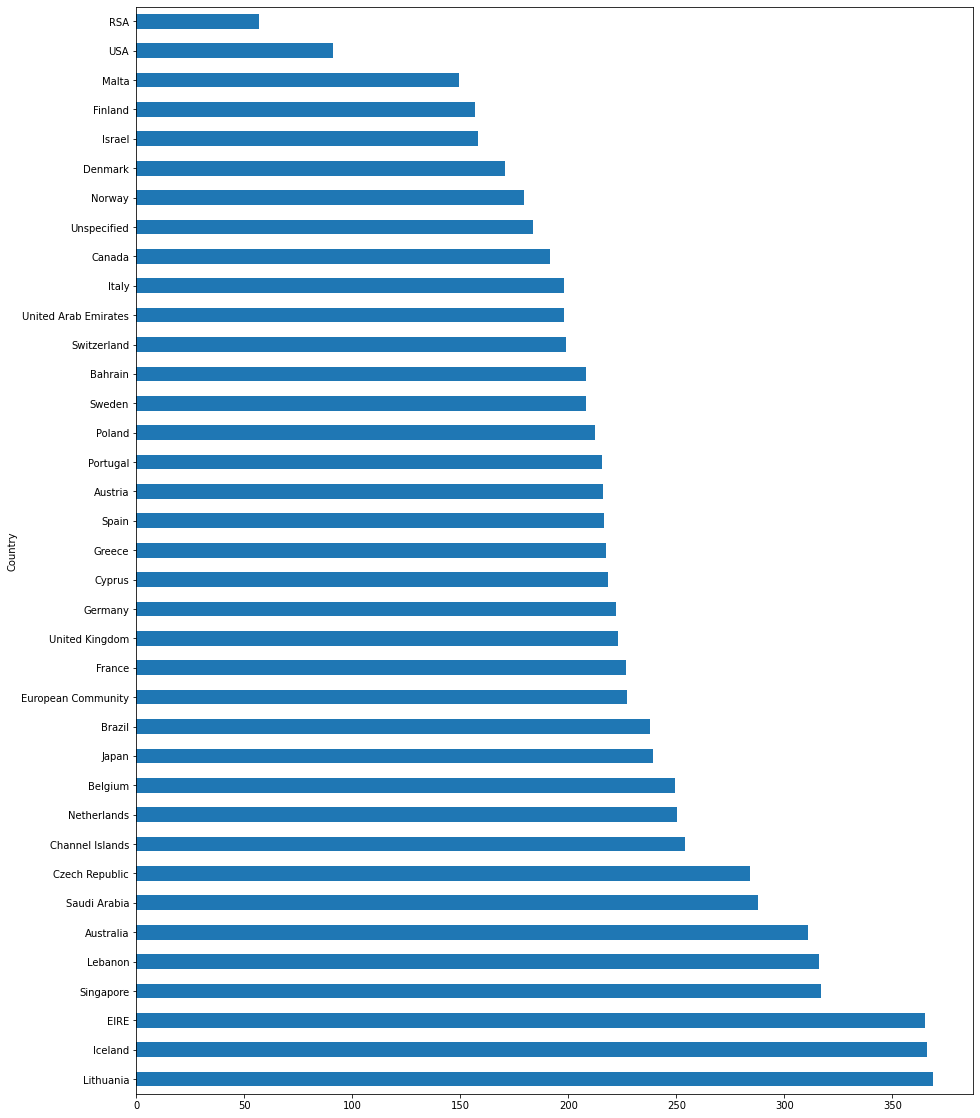

In [36]:
plt.figure(figsize=(15,20))
new1_df.groupby("Country").Last_transaction.mean().sort_values(ascending=False).plot.barh()
plt.show()

On average, Customers in Lithuania shop the most recently

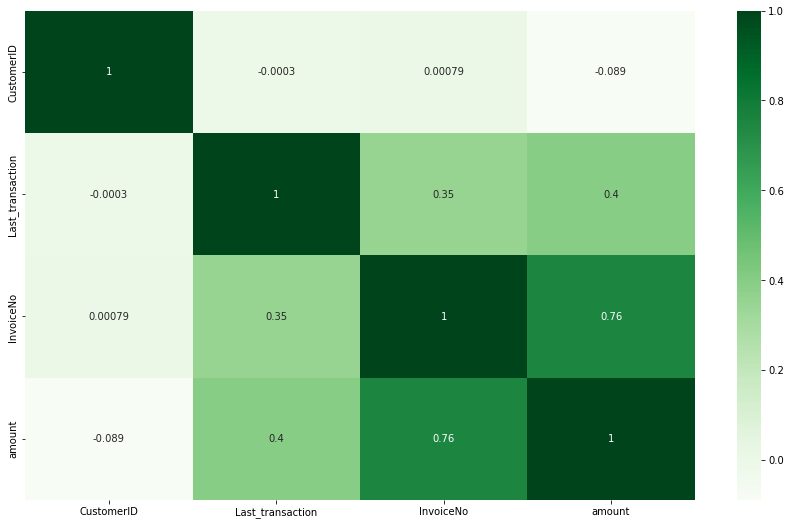

In [37]:
plt.figure(figsize=(15,9))
sns.heatmap(new1_df.corr(),cmap="Greens", annot=True)
plt.show()

Each square shows the correlation between the variables on each axis.

Values closer to zero means there is no linear trend between the two variables.

The close to 1 the correlation is the more positively correlated they are;

A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases.

As the heatmap shows, Total Amount and InvoiceNo is correlated positively

<Figure size 1080x576 with 0 Axes>

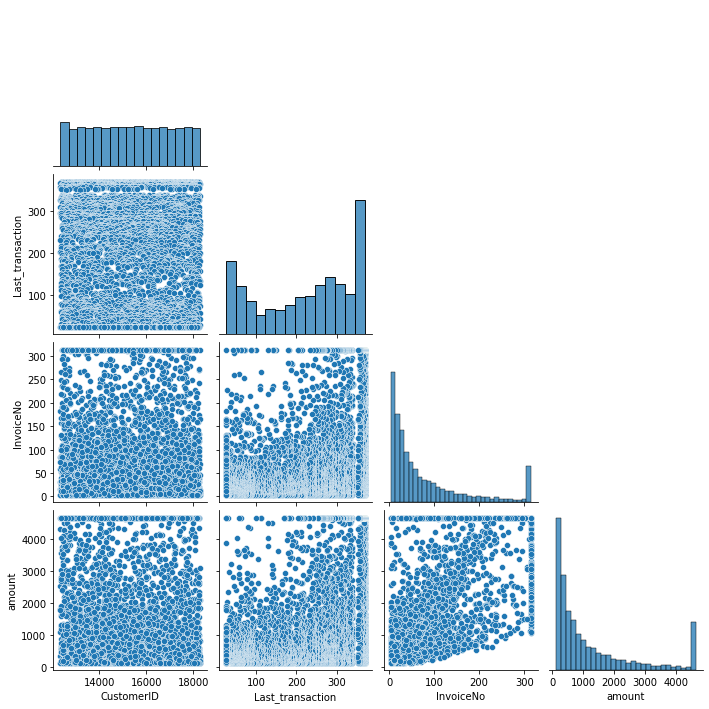

In [38]:
plt.figure(figsize=(15,8))
sns.pairplot(new1_df, corner=True)
plt.show()

In [39]:
#Scaling the numeric data
from sklearn.preprocessing import MinMaxScaler
new2_df=new1_df[['Last_transaction','InvoiceNo','amount']]
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(new2_df)
scaled_df = pd.DataFrame(scaled_df)
scaled_df.columns=['Last_transaction','InvoiceNo','amount']
scaled_df['Country']=new1_df['Country']
scaled_df

,Last_transaction,InvoiceNo,amount,Country
0,1.0,0.216129,0.040678,United Kingdom
1,1.0,1.000000,1.000000,United Kingdom
2,1.0,0.364516,0.676727,United Kingdom
3,1.0,0.541935,0.687115,United Kingdom
4,1.0,1.000000,1.000000,United Kingdom
...,...,...,...,...
4342,0.0,0.235484,0.075164,United Kingdom
4343,0.0,0.045161,0.047312,United Kingdom
4344,0.0,0.000000,0.050960,United Kingdom
4345,0.0,0.025806,0.021643,United Kingdom


## Clustering

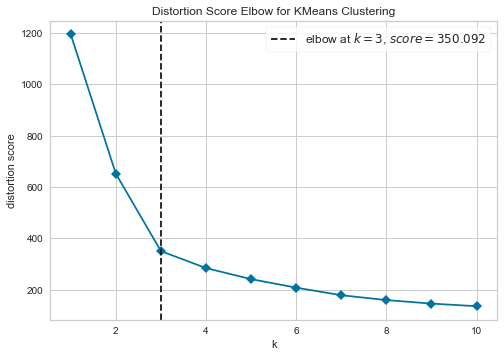

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [40]:
df_k=scaled_df.drop(columns=['Country'],axis=1)
# Elbow Method for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(1,11), timings= False)
visualizer.fit(df_k)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

Elbow method helps us decide the clusters for our data are 3. Next step I want to visualize the data by clusters

In [41]:
scaled_df

,Last_transaction,InvoiceNo,amount,Country
0,1.0,0.216129,0.040678,United Kingdom
1,1.0,1.000000,1.000000,United Kingdom
2,1.0,0.364516,0.676727,United Kingdom
3,1.0,0.541935,0.687115,United Kingdom
4,1.0,1.000000,1.000000,United Kingdom
...,...,...,...,...
4342,0.0,0.235484,0.075164,United Kingdom
4343,0.0,0.045161,0.047312,United Kingdom
4344,0.0,0.000000,0.050960,United Kingdom
4345,0.0,0.025806,0.021643,United Kingdom


In [42]:
df_k=scaled_df.drop(columns=['Country'],axis=1)
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df_k)
scaled_df['clusters']= y_predicted
scaled_df

,Last_transaction,InvoiceNo,amount,Country,clusters
0,1.0,0.216129,0.040678,United Kingdom,0
1,1.0,1.000000,1.000000,United Kingdom,2
2,1.0,0.364516,0.676727,United Kingdom,2
3,1.0,0.541935,0.687115,United Kingdom,2
4,1.0,1.000000,1.000000,United Kingdom,2
...,...,...,...,...,...
4342,0.0,0.235484,0.075164,United Kingdom,1
4343,0.0,0.045161,0.047312,United Kingdom,1
4344,0.0,0.000000,0.050960,United Kingdom,1
4345,0.0,0.025806,0.021643,United Kingdom,1


C:\Users\ASUS\AppData\Local\Temp\ipykernel_22460\540446604.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new2_df['clusters']= y_predicted


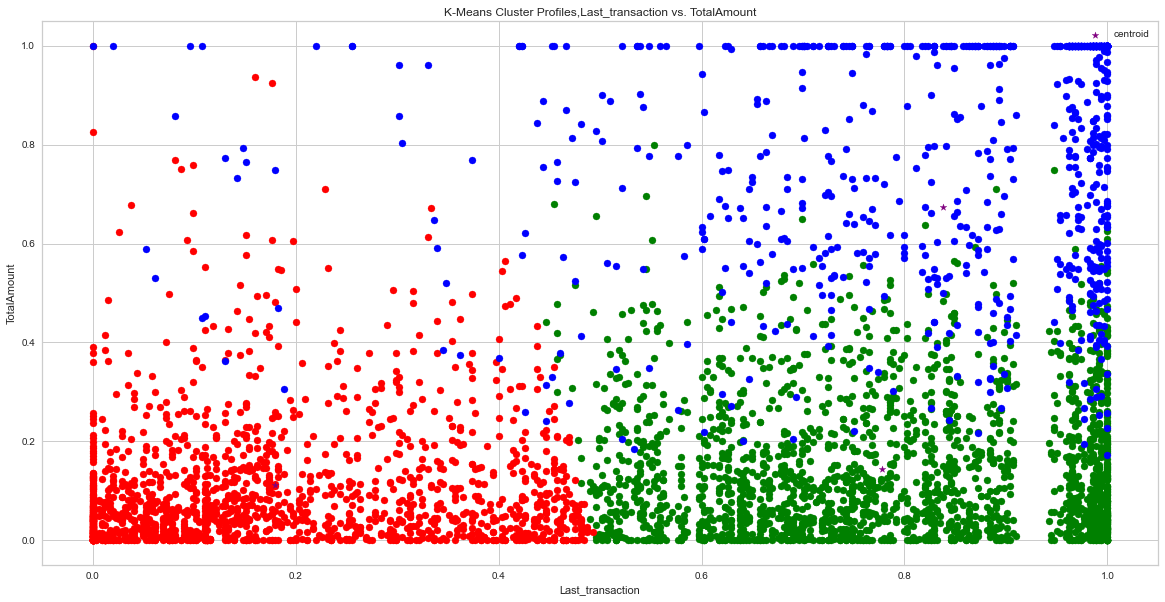

In [43]:
# Visualize the clusters with original data
new2_df['clusters']= y_predicted
df1 = scaled_df[new2_df.clusters==0]
df2 = scaled_df[new2_df.clusters==1]
df3 = scaled_df[new2_df.clusters==2]
plt.figure(figsize=(20,10))
plt.scatter(df1.Last_transaction,df1['amount'],color='green')
plt.scatter(df2.Last_transaction,df2['amount'],color='red')
plt.scatter(df3.Last_transaction,df3['amount'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()
plt.xlabel('Last_transaction')
plt.ylabel('TotalAmount')
plt.title('K-Means Cluster Profiles,Last_transaction vs. TotalAmount')
plt.show()

Group1: customer spent up to $2500 per purchase and their lastest order is within 3 months

Group 2: customer spent up to $1500 per purchase and their lastest order is between 3 months to 13 months

Group 3: customer spent from $ 1500 to 3500 per purchase and their lastest order varies from 1.5 month to 13 months

In [44]:
scaled_df


,Last_transaction,InvoiceNo,amount,Country,clusters
0,1.0,0.216129,0.040678,United Kingdom,0
1,1.0,1.000000,1.000000,United Kingdom,2
2,1.0,0.364516,0.676727,United Kingdom,2
3,1.0,0.541935,0.687115,United Kingdom,2
4,1.0,1.000000,1.000000,United Kingdom,2
...,...,...,...,...,...
4342,0.0,0.235484,0.075164,United Kingdom,1
4343,0.0,0.045161,0.047312,United Kingdom,1
4344,0.0,0.000000,0.050960,United Kingdom,1
4345,0.0,0.025806,0.021643,United Kingdom,1


C:\Users\ASUS\AppData\Local\Temp\ipykernel_22460\404375578.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)


Text(0.5, 0.92, 'K Means')

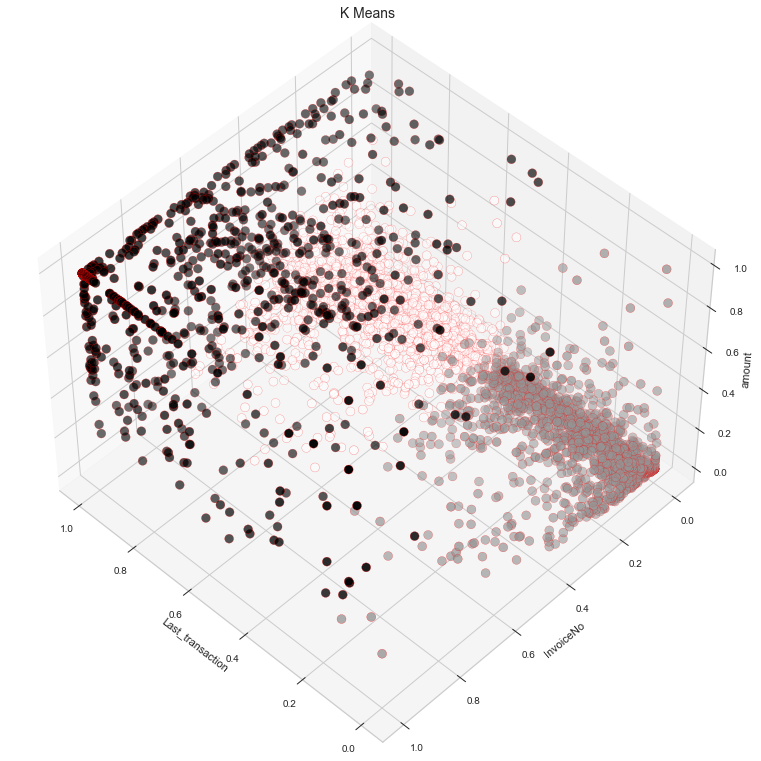

In [45]:
from mpl_toolkits.mplot3d import Axes3D
#Plotting
fig = plt.figure(1, figsize=(20,10))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(scaled_df['Last_transaction'], 
           scaled_df['InvoiceNo'], 
           scaled_df['amount'],
           c= (scaled_df['clusters']), 
           edgecolor="red", s=80)
ax.set_xlabel("Last_transaction")
ax.set_ylabel("InvoiceNo")
ax.set_zlabel("amount")
plt.title("K Means", fontsize=14)